# Data Science Assignment - 4
## Polynomial Regression on position salaries dataset from Kaggle
Dataset link - https://www.kaggle.com/jaypradipshah/polynomial-regression-from-scratch/data?select=Position_Salaries.csv

##### Name: Boganadham Venkata Sai Manoj
##### Section: A
##### Roll no: 197121

In [2]:
# Importing the required modules first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

# Import the dataset 
raw_data = pd.read_csv('Position_Salaries.csv')
raw_data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Text(0, 0.5, 'Salary')

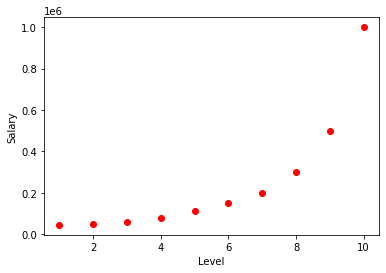

In [3]:
# Plotting the raw data
plt.plot(raw_data['Level'], raw_data['Salary'], 'ro')
plt.xlabel("Level")
plt.ylabel("Salary")

From the plot of this simple data, it is clear that the relation between salary and level is not linear but some higher degree polynomial. So we can not fit a normal Linear Regression model to this data. Let us try to fit an appropriate degree polynomial by trial-and-error.

##### Function to split the data into training and testing Numpy arrays

In [104]:
# Creating a function to create training and testing data from the pandas dataframe
# Returns 4 numpy arrays: X_train, Y_train, X_test, Y_test
# The X_train and X_test are returned with the first column as ones
def create_training_and_testing_data(raw_data):
    # Dropping the unwanted columns
    raw_data = raw_data.drop(['Position'], axis=1)
    X = raw_data['Level'].values
    Y = raw_data['Salary'].values
    # Create a list of columns in the dataframe
    columns = list(raw_data.columns)
    
    # Sample the dataframe into training and testing data
    train_data = raw_data.sample(frac=0.8, random_state=25)
    test_data = raw_data.drop(train_data.index)
    
    # Split the training data into X and Y
    X_train = train_data[columns[:-1]]
    Y_train = train_data[columns[-1]]

    # Split the testing data into X and Y
    X_test = test_data[columns[:-1]]
    Y_test = test_data[columns[-1]]

    # Convert the X and Y data into numpy arrays
    X_train = X_train.values
    Y_train = Y_train.values
    Y_train = Y_train.reshape(len(Y_train), 1)
    X_test = X_test.values
    Y_test = Y_test.values
    Y_test = Y_test.reshape(len(Y_test), 1)
    
    # Adding ones to the X data
    X_train = np.c_[np.ones(len(X_train)), X_train]
    X_test = np.c_[np.ones(len(X_test)), X_test]


    return X, Y, X_train, Y_train, X_test, Y_test



##### Function to raise the degree of a column

In [38]:
# Raise particular column in a numpy array to desired degree
def raise_column_to_power(arr, power, column):
    for i in range(len(arr)):
        arr[i][column] = arr[i][column] ** power
    return arr


##### Function to normalise the training data

In [76]:
def norm_data(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    for i in range(X.shape[0]):
        X[i][1] = (X[i][1] - mean[1])/std[1]
    return X

##### Cost Function

In [26]:
# Get the cost function
def J(X, Y, theta):
    m = len(X)
    h = X @ theta - Y
    h_T = np.transpose(h)
    sqr = h_T @ h
    cost = (sqr)/(2*m)
    return cost

##### Get gradient function

In [80]:
# Get gradient function
def gradient(X, Y, theta):
    m = X.shape[0]
    h = X @ theta
    X_T = np.transpose(X)
    h = np.subtract(h, Y)
    pd = (X_T @ h)/m
    return pd

##### Function to perform Gradient descent

In [175]:
# Function to create a linear regression model
def polynomial_regression(X_train, Y_train, epochs, alpha, degree):
    m = X_train.shape[0]
    n = X_train.shape[1]
    cost_arr = []
    # Initialising the parameters
    theta = np.zeros((n, 1), dtype=float)
    # Converting the X_train data into a polynomial form
    X_train = norm_data(X_train)
    X_train = raise_column_to_power(X_train, degree, 1)
    # Perfoming the gradient descent
    for i in range(epochs):
        theta = theta - alpha*gradient(X_train, Y_train, theta)
        cost = J(X_train, Y_train, theta)
        cost_arr.append(cost)
        # print("Cost at epoch {} is {}".format(i, cost));
    # Returning the parameters
    return theta

##### Get the predicted values

In [176]:
# Get the predictions
def get_predictions(X_test, theta, degree):
    X_test = norm_data(X_test)
    X_test = raise_column_to_power(X_test, degree, 1)
    predictions = X_test @ theta
    return predictions

##### Root Mean Squared Error

In [169]:
# Get the root mean squared error
def get_rmse(Y_test, predictions):
    m = len(Y_test)
    rmse = np.sqrt(np.sum((predictions - Y_test)**2)/m)
    return rmse

##### Fit and plot the data

In [185]:
# Function to fit and plot the model
def fit_and_plot_model(raw_data, epochs, alpha, degree):
    # Preparing the data for training
    X, Y, X_train, Y_train, X_test, Y_test = create_training_and_testing_data(raw_data)
    # Training the model on the data
    theta = polynomial_regression(X_train, Y_train, epochs, alpha, degree)
    # Getting predictions on the data
    predictions = get_predictions(X_test, theta, degree)
    # Getting the Root Mean Squared error
    rmse = get_rmse(Y_test, predictions)
    # Plotting the graph of the model
    temp = X
    plt.plot(X , Y, 'ro')
    X.reshape(X.shape[0], 1)
    X = np.c_[np.ones(len(X)), X]
    plt.plot(temp , get_predictions(X, theta, degree).reshape(X.shape[0]), 'b')
    plt.plot()
    return rmse

### Polynomial Regression

Now let us try fitting the model for different degrees of the level column
We will try to fit the model for degree 2, 3, 4, 5

RMSE at degree  2  is  126481.37814011595
RMSE at degree  3  is  161463.25228077252
RMSE at degree  4  is  72072.12139876821
RMSE at degree  5  is  101942.0086824339
RMSE at degree  6  is  50285.66409962275


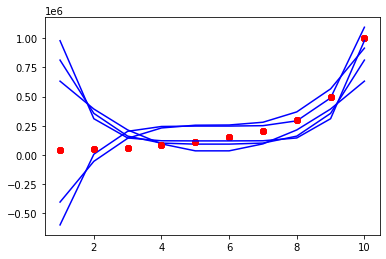

In [186]:
# Now let us try fitting the model for different degrees of the level column
# We will try to fit the model for degree 2,3,4,5,6

rmse_list = []
for i in range(2,7):
    rmse = fit_and_plot_model(raw_data, 500, 0.05, i)
    rmse_list.append(rmse)
    print("RMSE at degree ", i, " is ", rmse);


We can see how the root mean squared error is changing with change in the degree of polynomial